In [11]:
import csv

file_path = "Eth_Txs.csv"

tras= []

with open(file_path, "r") as file:
    csv_reader = csv.reader(file)

 
    for row in csv_reader:
        tras.append(row)

tras_sum = len(tras)
print("전체 트랜잭션 개수:", tras_sum)

전체 트랜잭션 개수: 499467


In [5]:
import pandas as pd

df = pd.read_csv('Eth_Txs.csv')
 
df[['Amount', 'Unit']] = df['Value'].str.split(' ', expand=True)
 
df['Amount'] = df['Amount'].str.replace(',', '').astype(float)

 
df.loc[df['Unit'] == 'Ether', 'Amount'] *= 1e18

sender = df.groupby('From')['Amount'].sum().sort_values(ascending=False).head(10)
print('Eth 가장 많이 보낸 10개 주소:')
print(sender)

Eth 가장 많이 보낸 10개 주소:
From
0xb2cda80105482967f0cda72162b0c7b80a787b99    3.689994e+22
BinanceWallet                                 3.585394e+22
0x0681d8db095565fe8a346fa0277bffde9c0edbbf    1.683586e+22
Bitfinex_Wallet4                              1.611201e+22
Bittrex                                       1.574393e+22
0xf726dc178d1a4d9292a8d63f01e0fa0a1235e65c    1.464083e+22
BinanceWallet_2                               1.391798e+22
0xa8446c4781a737ac4328b1e15b8a0b3fbb0fd668    1.350099e+22
Kraken_4                                      1.284759e+22
0x5f7ff8f2ac77d0255d0dbd3c98e101f35791b022    1.031500e+22
Name: Amount, dtype: float64


In [19]:
active = df['From'].value_counts().head(10)
print('\n거래 내역 많은 트랜잭션 10개 주소:')
print(active)



거래 내역 많은 트랜잭션 10개 주소:
From
Ethermine                                     22446
ethfans.org_2                                 17888
0x00805ea227ac94796e92f619440c590f3f8e1615    16162
f2pool_2                                      14001
Nanopool                                      12874
0x99a7fdf466b44301317453c4fbe213f5114519f5    10607
0x03747f06215b44e498831da019b27f53e483599f     9578
0xceceaa8edc0830c7cec497e33bb3a3c28dd55a32     8683
Bittrex                                        7901
0xad68942a95fdd56594aa5cf862b358790e37834c     6143
Name: count, dtype: int64


In [40]:
receiver = df.groupby('To')['Amount'].sum().sort_values(ascending=False).head(10)
print('Eth 가장 많이 받은 10개 주소:')
print(receiver)

Eth 가장 많이 받은 10개 주소:
To
BinanceWallet                                 4.197777e+22
0x1e39fbf0c16a20f65613a4ed1baa088a8937b15c    3.689994e+22
EOSCrowdsale                                  1.533139e+22
0x8477c637bab24782b5cc9d42fadc194dc128d4fa    1.405015e+22
Bitfinex_Wallet4                              1.391405e+22
0x0681d8db095565fe8a346fa0277bffde9c0edbbf    1.356900e+22
0xf726dc178d1a4d9292a8d63f01e0fa0a1235e65c    1.338165e+22
0x236f9f97e0e62388479bf9e5ba4889e46b0273c3    1.264686e+22
0xa8c725bf5edae1f842dd0b74a9cd8ebccc4d4a52    1.250100e+22
BinanceWallet_2                               1.224500e+22
Name: Amount, dtype: float64


In [47]:
import pandas as pd

# 데이터 로드

# 각 주소의 거래 내역 분석
for address in active.index:
    print(f"주소: {address}")
    
    # 해당 주소의 거래 내역 추출
    address_txs = df[df['From'] == address]
    
    # 총 거래 횟수
    total_txs = len(address_txs)
    print(f"총 거래 횟수: {total_txs}")
    
    print("\n")

주소: Ethermine
총 거래 횟수: 22446


주소: ethfans.org_2
총 거래 횟수: 17888


주소: 0x00805ea227ac94796e92f619440c590f3f8e1615
총 거래 횟수: 16162


주소: f2pool_2
총 거래 횟수: 14001


주소: Nanopool
총 거래 횟수: 12874


주소: 0x99a7fdf466b44301317453c4fbe213f5114519f5
총 거래 횟수: 10607


주소: 0x03747f06215b44e498831da019b27f53e483599f
총 거래 횟수: 9578


주소: 0xceceaa8edc0830c7cec497e33bb3a3c28dd55a32
총 거래 횟수: 8683


주소: Bittrex
총 거래 횟수: 7901


주소: 0xad68942a95fdd56594aa5cf862b358790e37834c
총 거래 횟수: 6143




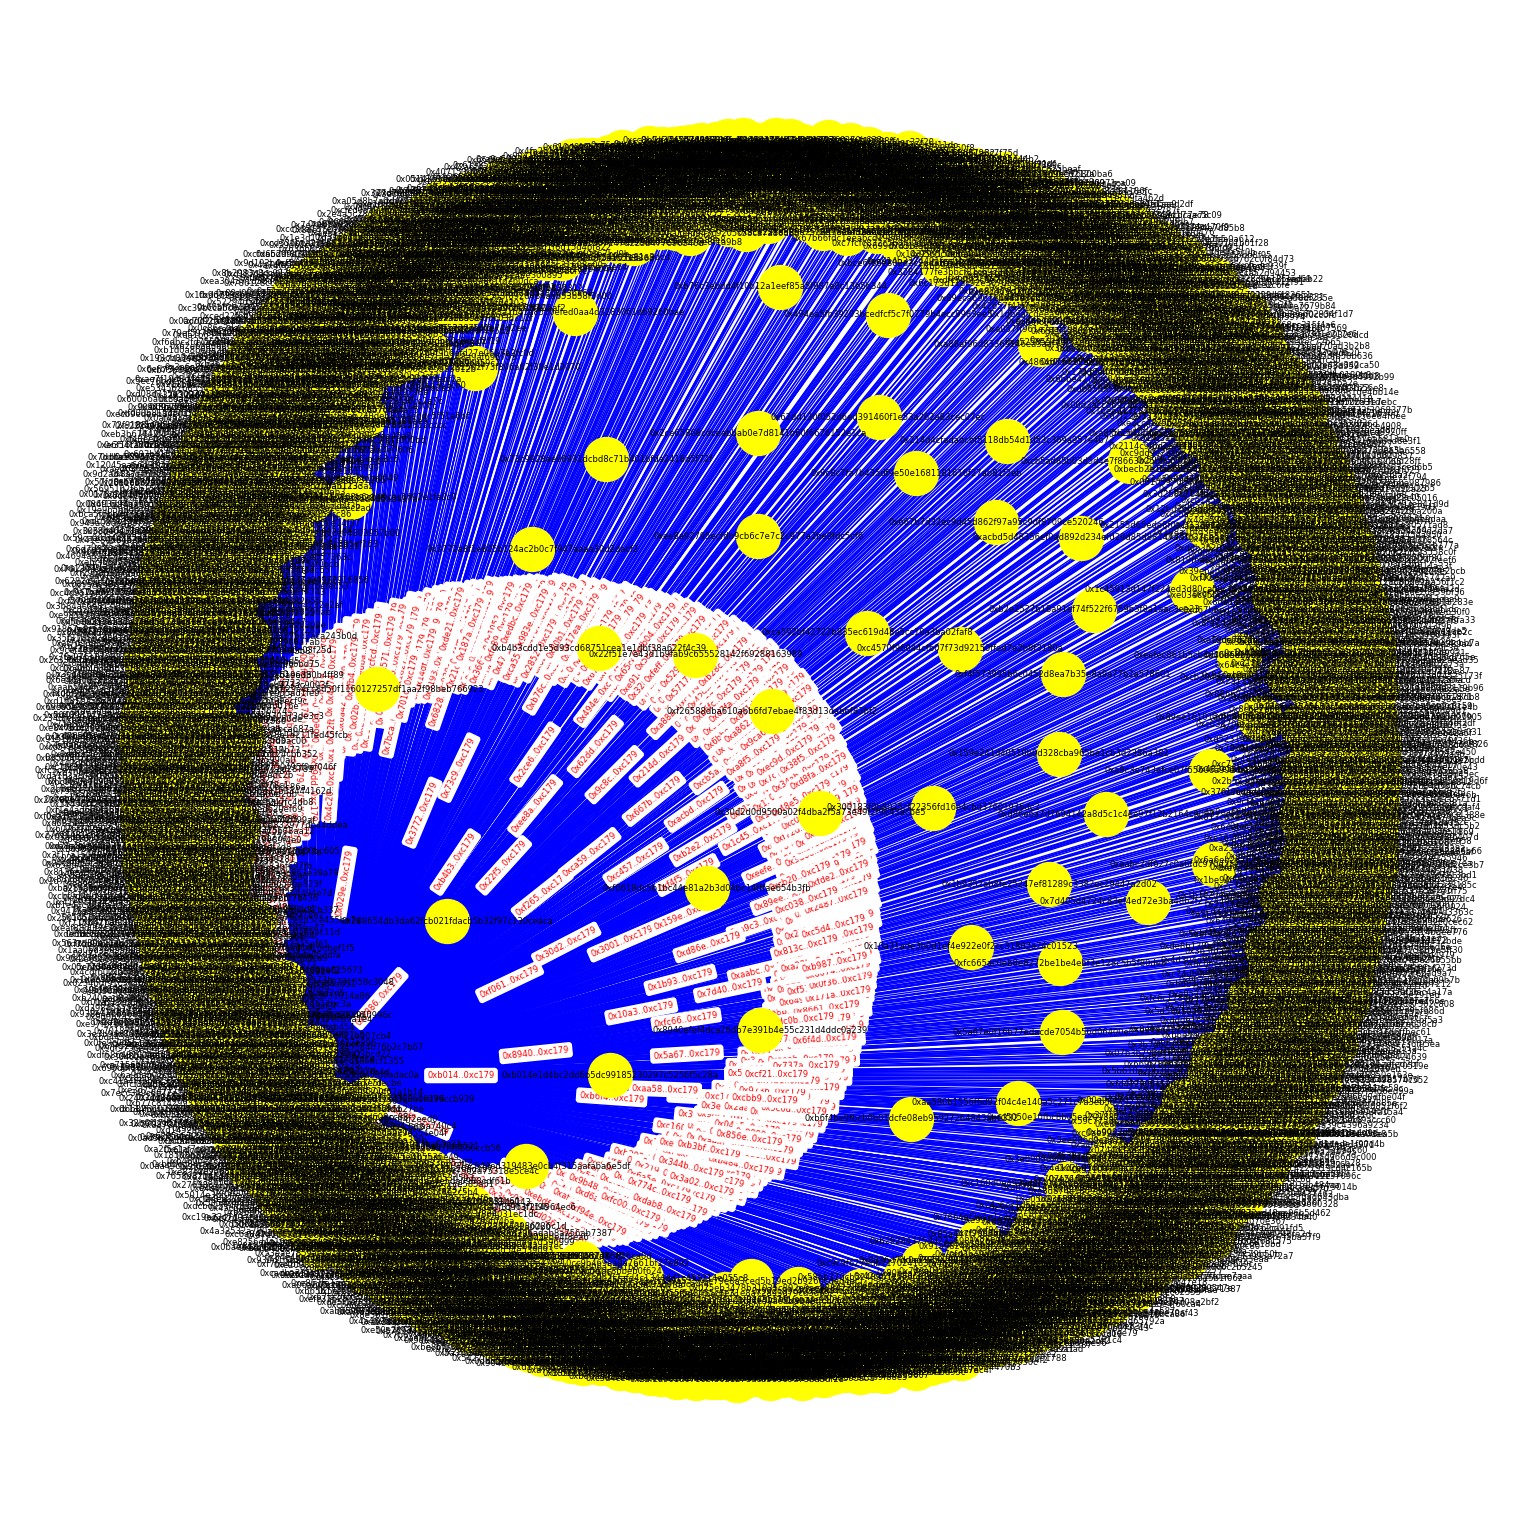

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


file_path = 'Eth_Txs.csv'
df = pd.read_csv(file_path)


address = "0xc179fbddc946694d11185d4e15dbba5fd0adac0a"


connected_txs = df[(df['From'] == address) | (df['To'] == address)]


G = nx.from_pandas_edgelist(connected_txs, 'From', 'To', create_using=nx.DiGraph())


plt.figure(figsize=(15, 15)) 
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos, with_labels=True, node_color='yellow', node_size=1000, edge_color='blue', font_size=6, arrows=True)  


edge_labels = {(u, v): u[0:6]+'..'+v[0:6] for u, v in G.edges()} 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

plt.show()

In [24]:
import pandas as pd
import networkx as nx

G = nx.from_pandas_edgelist(df, 'From', 'To', create_using=nx.DiGraph())

pr = nx.pagerank(G, alpha=0.85)

top_addresses = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:20]

for i, (address, pr_value) in enumerate(top_addresses):
    print(f"Rank {i+1}: Address {address}, PageRank value:  {'{:.10f}'.format(pr_value)}")

Rank 1: Address BinanceWallet, PageRank value:  0.0188436607
Rank 2: Address IDEX_1, PageRank value:  0.0079494006
Rank 3: Address Shapeshift, PageRank value:  0.0066625103
Rank 4: Address 0xc179fbddc946694d11185d4e15dbba5fd0adac0a, PageRank value:  0.0057004790
Rank 5: Address etherdelta_2, PageRank value:  0.0052077599
Rank 6: Address Yobit, PageRank value:  0.0050214666
Rank 7: Address BeeToken, PageRank value:  0.0044373827
Rank 8: Address NAGA Coin, PageRank value:  0.0040366393
Rank 9: Address 0x390de26d772d2e2005c6d1d24afc902bae37a4bb, PageRank value:  0.0039071268
Rank 10: Address CreditsToken, PageRank value:  0.0036265419
Rank 11: Address EOSTokenContract, PageRank value:  0.0034939544
Rank 12: Address 0x275b69aa7c8c1d648a0557656bce1c286e69a29d, PageRank value:  0.0030530876
Rank 13: Address 0xfa52274dd61e1643d2205169732f29114bc240b3, PageRank value:  0.0029655689
Rank 14: Address 0x236f9f97e0e62388479bf9e5ba4889e46b0273c3, PageRank value:  0.0027101229
Rank 15: Address 0x2b5

In [14]:
import pandas as pd
import networkx as nx


address = "0x00805ea227ac94796e92f619440c590f3f8e1615"


G = nx.from_pandas_edgelist(df, 'From', 'To', create_using=nx.DiGraph())

pr = nx.pagerank(G, alpha=0.85)

print(f"The PageRank of address {address} is {'{:.10f}'.format(pr_value)}")

The PageRank of address 0x00805ea227ac94796e92f619440c590f3f8e1615 is 0.0030530876


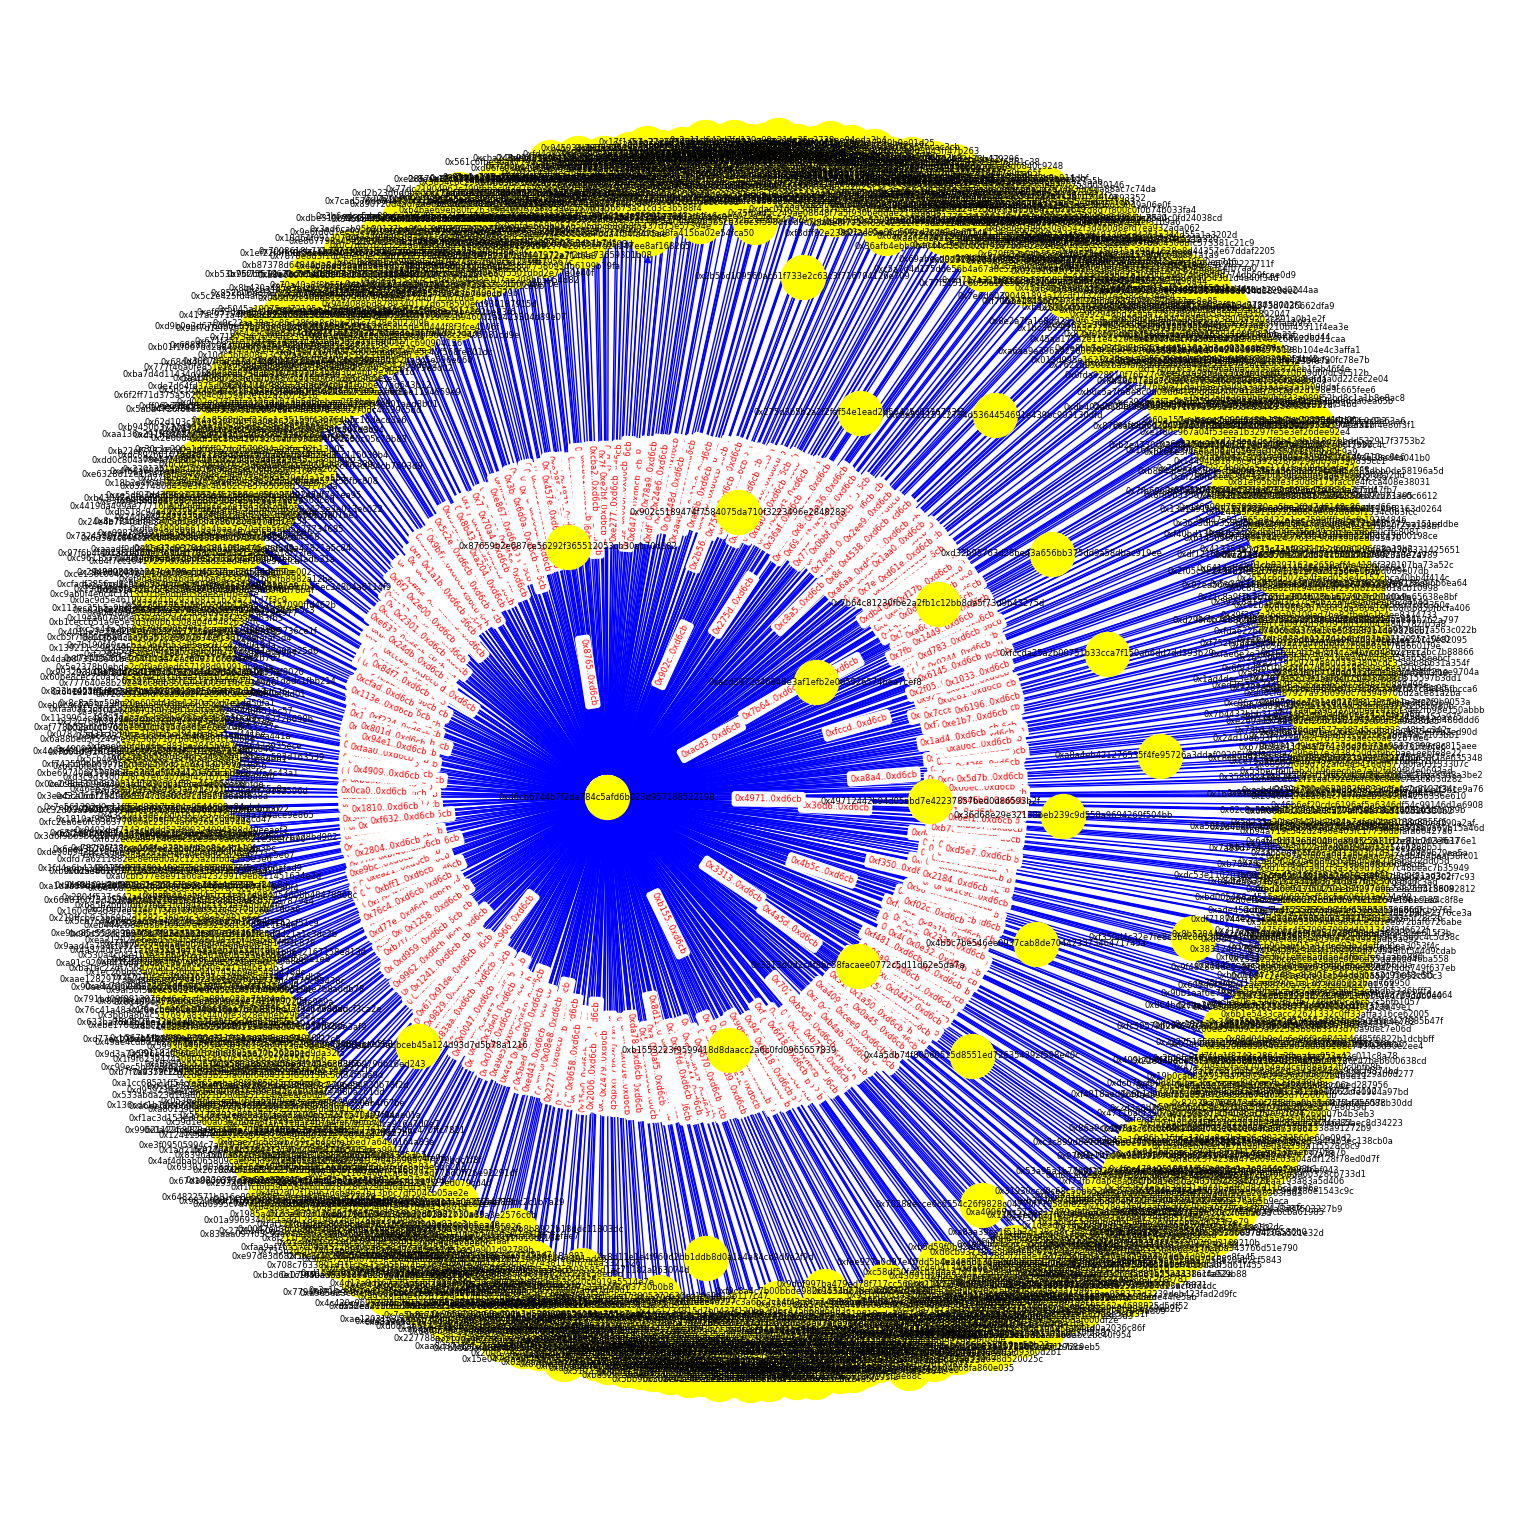

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


file_path = 'Eth_Txs.csv'
df = pd.read_csv(file_path)


address = "0xd6cb6744b7f2da784c5afd6b023d957188522198"


connected_txs = df[(df['From'] == address) | (df['To'] == address)]


G = nx.from_pandas_edgelist(connected_txs, 'From', 'To', create_using=nx.DiGraph())


plt.figure(figsize=(15, 15)) 
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos, with_labels=True, node_color='yellow', node_size=1000, edge_color='blue', font_size=6, arrows=True)  


edge_labels = {(u, v): u[0:6]+'..'+v[0:6] for u, v in G.edges()} 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

plt.show()